<a href="https://colab.research.google.com/github/Trace-dap-troai/Group-Exercise/blob/main/Group_Excercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing on a Real Dataset

## Group Members
Munib Ahmed

Chech Trac,Way

## Collaboration Statement
This project was completed collaboratively by both group members.
We met in person at the university and worked together on all parts
of the data preprocessing tasks.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Dataset Information

- **Dataset name:** Wine Quality Dataset (Red Wine)
- **Source:** UCI Machine Learning Repository  
  https://archive.ics.uci.edu/ml/datasets/wine+quality
- **Description:**  
  This dataset contains physicochemical properties of red wine samples
  along with a quality score. It includes numerical features and is
  suitable for preprocessing tasks such as scaling, noise handling,
  and outlier detection.


In [22]:
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [23]:
# Artificially introduce missing values
df_missing = df.copy()
df_missing.loc[df_missing.sample(frac=0.05, random_state=42).index, 'alcohol'] = np.nan

# Check missing values
df_missing.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [24]:
# Imputation using mean
df_missing['alcohol'] = df_missing['alcohol'].fillna(df_missing['alcohol'].mean())


Missing values were artificially introduced to simulate real-world data issues.
The numerical feature *alcohol* was imputed using the mean value to preserve
the overall distribution.


In [25]:
#2 SCALING NUMERICAL FEATURES
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_zscore = scaler.fit_transform(df_missing[['alcohol', 'pH']])


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
df_minmax = scaler_mm.fit_transform(df_missing[['alcohol', 'pH']])


- Z-score standardization rescales features to have mean 0 and standard deviation 1.
- Min–Max normalization rescales features into the range [0, 1].
- Z-score is generally more robust to outliers compared to Min–Max scaling.


In [27]:
#3 HANDLING NOISE
df_noise = df_missing.copy()
df_noise['alcohol_noisy'] = df_noise['alcohol'] + np.random.normal(0, 0.3, size=len(df_noise))
df_noise['alcohol_smooth'] = df_noise['alcohol_noisy'].rolling(window=5).mean()


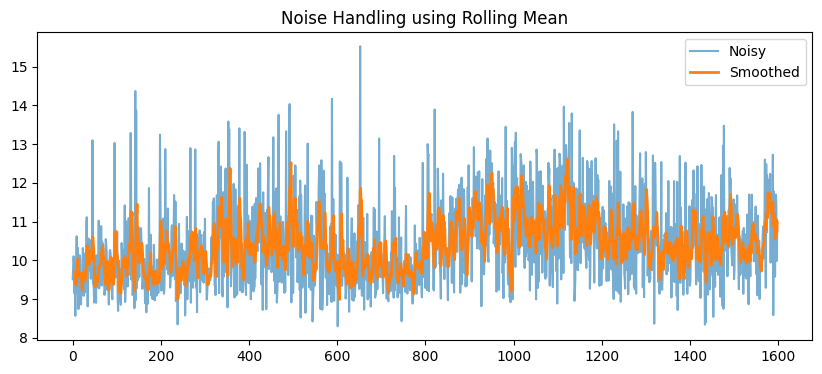

In [28]:
#Plot Before vs After
plt.figure(figsize=(10,4))
plt.plot(df_noise['alcohol_noisy'], label='Noisy', alpha=0.6)
plt.plot(df_noise['alcohol_smooth'], label='Smoothed', linewidth=2)
plt.legend()
plt.title("Noise Handling using Rolling Mean")
plt.show()



Artificial noise was added to simulate measurement errors.
A rolling mean smoothing technique was applied to reduce short-term fluctuations.


In [29]:
#4 HANDLING OUTLIERS
from scipy import stats

z_scores = np.abs(stats.zscore(df_noise['alcohol']))
outliers = df_noise[z_scores > 3]

len(outliers)
df_no_outliers = df_noise[z_scores <= 3]


Outliers were detected using the Z-score method with a threshold of |z| > 3.
These extreme values were removed to prevent distortion of statistical analysis
and scaling.


In [30]:
#5 FEATURE SELECTION
correlation = df_no_outliers.corr()['quality'].sort_values(ascending=False)
correlation

selected_features = correlation[1:6]
selected_features


,quality
alcohol,0.457936
alcohol_noisy,0.434419
alcohol_smooth,0.279690
sulphates,0.247684
citric acid,0.235600


A correlation-based filter method was chosen because it is simple, fast,
and effective for identifying features that have strong linear relationships
with the target variable (wine quality).
